<a href="https://colab.research.google.com/github/hari-reddy-008/taxi-price-prediction/blob/main/rv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, roc_auc_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

In [ ]:
# Loading Data
data = pd.read_csv('/content/drive/MyDrive/rv-1/rv3/taxi_trip_pricing.csv')

In [ ]:
data

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [ ]:
# Performing Data Checks
data.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [ ]:
# Checking For Null Values
data.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


**Filling The Null Values**

In [ ]:
data.loc[data['Time_of_Day'].isnull(), 'Time_of_Day'] = data['Time_of_Day'].mode()[0]

In [ ]:
data.loc[data['Day_of_Week'].isnull(), 'Day_of_Week'] = data['Day_of_Week'].mode()[0]

In [ ]:
data.loc[data['Traffic_Conditions'].isnull(), 'Traffic_Conditions'] = data['Traffic_Conditions'].mode()[0]

In [ ]:
data.loc[data['Weather'].isnull(), 'Weather'] = data['Weather'].mode()[0]

In [ ]:
data.loc[data['Trip_Distance_km'].isnull(), 'Trip_Distance_km'] = data['Trip_Distance_km'].interpolate()

In [ ]:
data.loc[data['Passenger_Count'].isnull(), 'Passenger_Count'] = data['Passenger_Count'].mode()[0]

In [ ]:
data.loc[data['Base_Fare'].isnull(), 'Base_Fare'] = data['Base_Fare'].interpolate()

In [ ]:
data.loc[data['Per_Km_Rate'].isnull(), 'Per_Km_Rate'] = data['Per_Km_Rate'].interpolate()

In [ ]:
data.loc[data['Per_Minute_Rate'].isnull(), 'Per_Minute_Rate'] = data['Per_Minute_Rate'].interpolate()

In [ ]:
data.loc[data['Trip_Duration_Minutes'].isnull(), 'Trip_Duration_Minutes'] = data['Trip_Duration_Minutes'].interpolate()

In [ ]:
data.loc[data['Trip_Price'].isnull(), 'Trip_Price'] = data['Trip_Price'].interpolate()

In [ ]:
# Checking For Duplicate Values
data.duplicated().sum()

np.int64(0)

**Performing EDA**

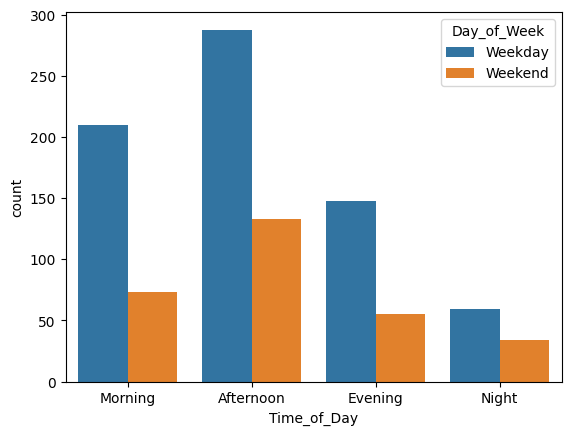

In [ ]:
sns.countplot(data=data, x = 'Time_of_Day', hue= 'Day_of_Week')
plt.show()

/tmp/ipython-input-5050722.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=data, x ='Traffic_Conditions', palette=['green', 'red', 'yellow'], hue='Day_of_Week')


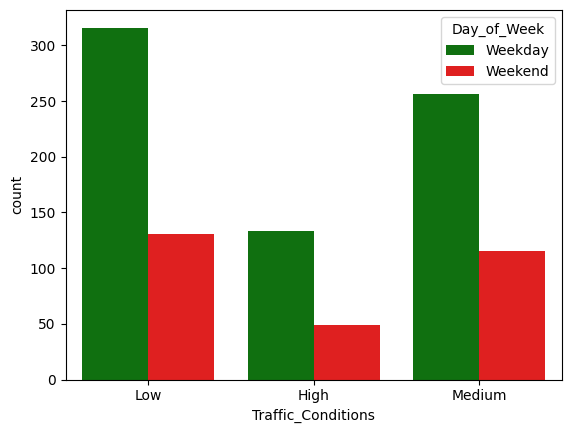

In [ ]:
sns.countplot(data=data, x ='Traffic_Conditions', palette=['green', 'red', 'yellow'], hue='Day_of_Week')
plt.show()

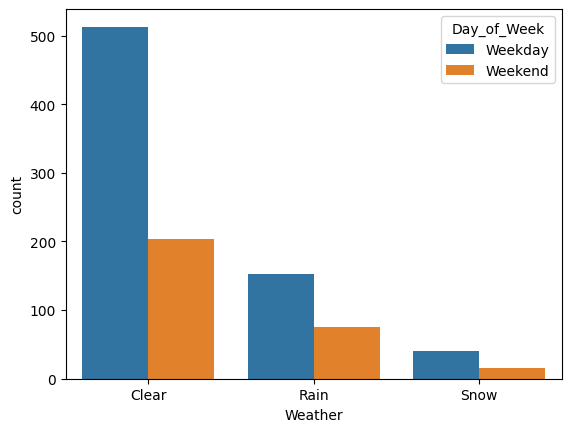

In [ ]:
sns.countplot(data=data, x = 'Weather', hue='Day_of_Week')
plt.show()

<Axes: xlabel='Passenger_Count', ylabel='count'>

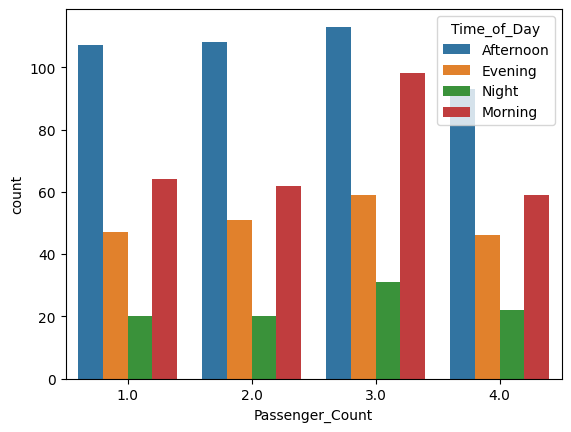

In [ ]:
sns.countplot(data=data, x = 'Passenger_Count', hue='Time_of_Day')

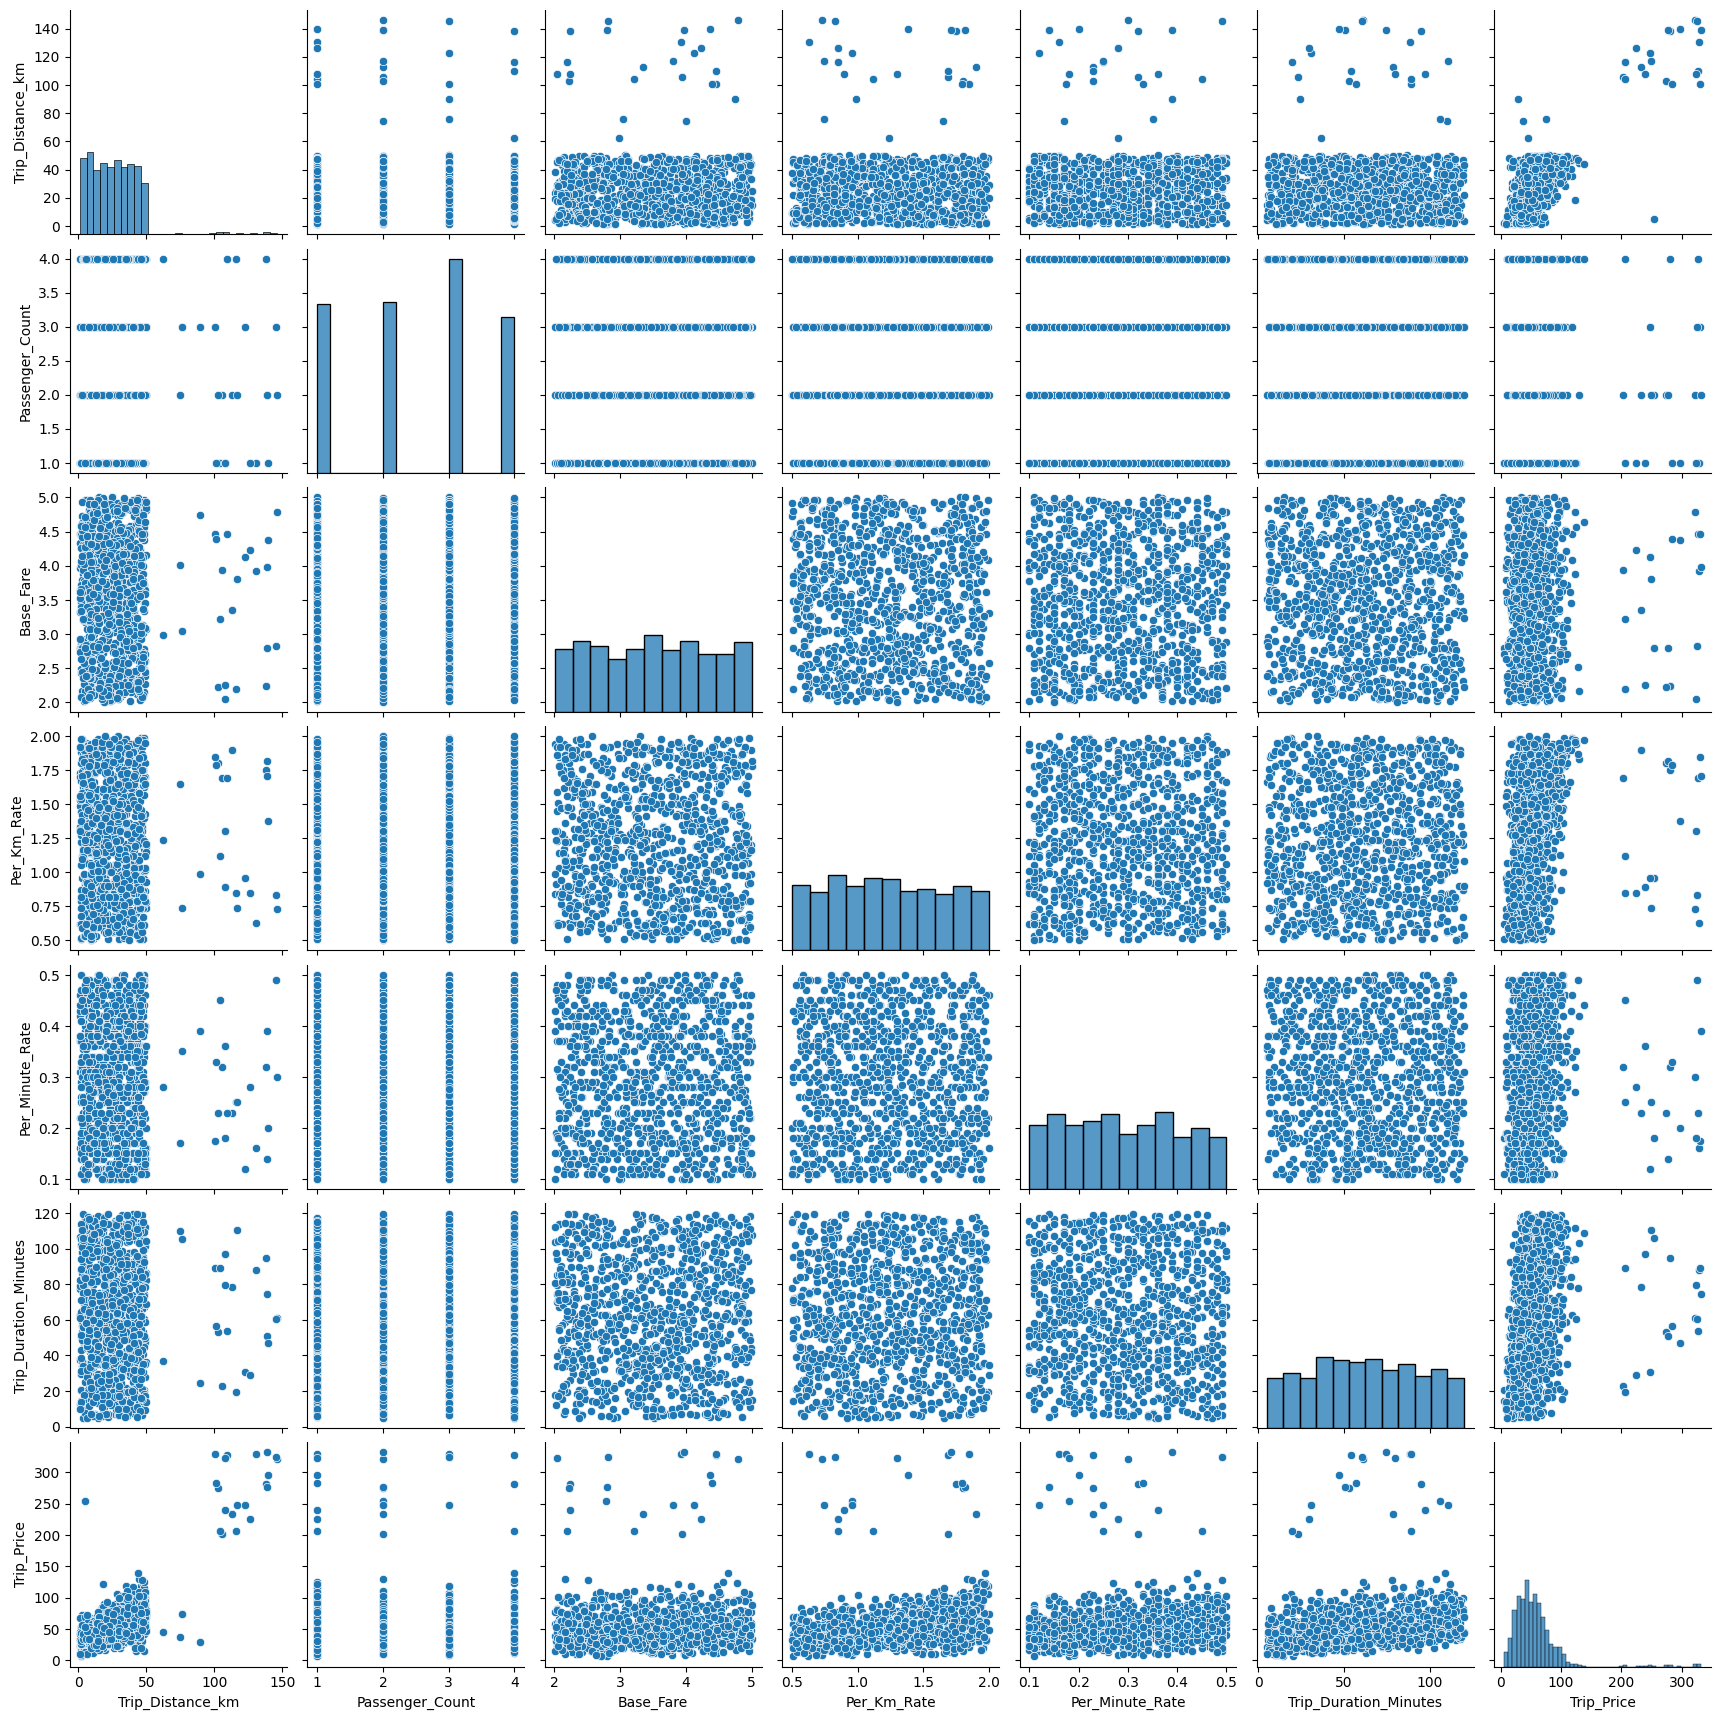

In [ ]:
sns.pairplot(data=data)
plt.show()

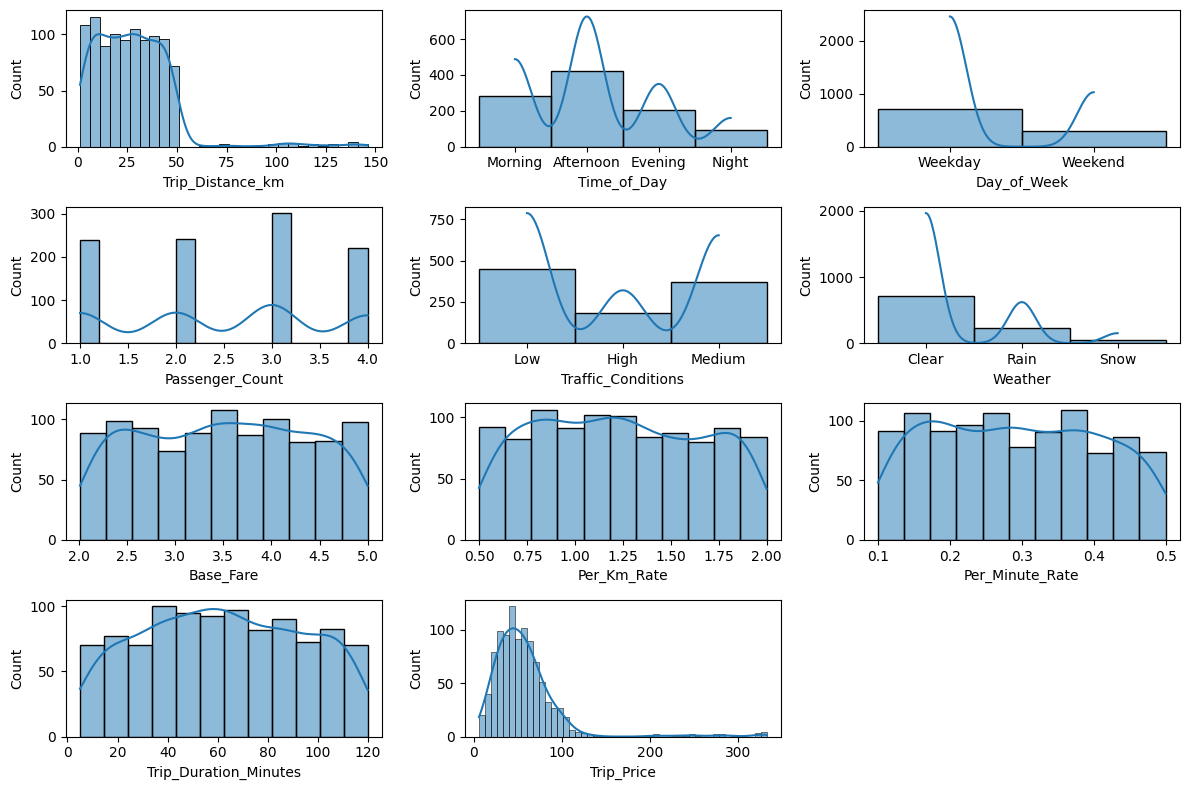

In [ ]:
# Checking The Distribution
plt.figure(figsize=(12,8))
p = 1
for i in data:
  if p <= 11:
    plt.subplot(4,3,p)
    sns.histplot(data[i], kde=True)
    plt.xlabel(i)
  p+=1
plt.tight_layout()
plt.show()

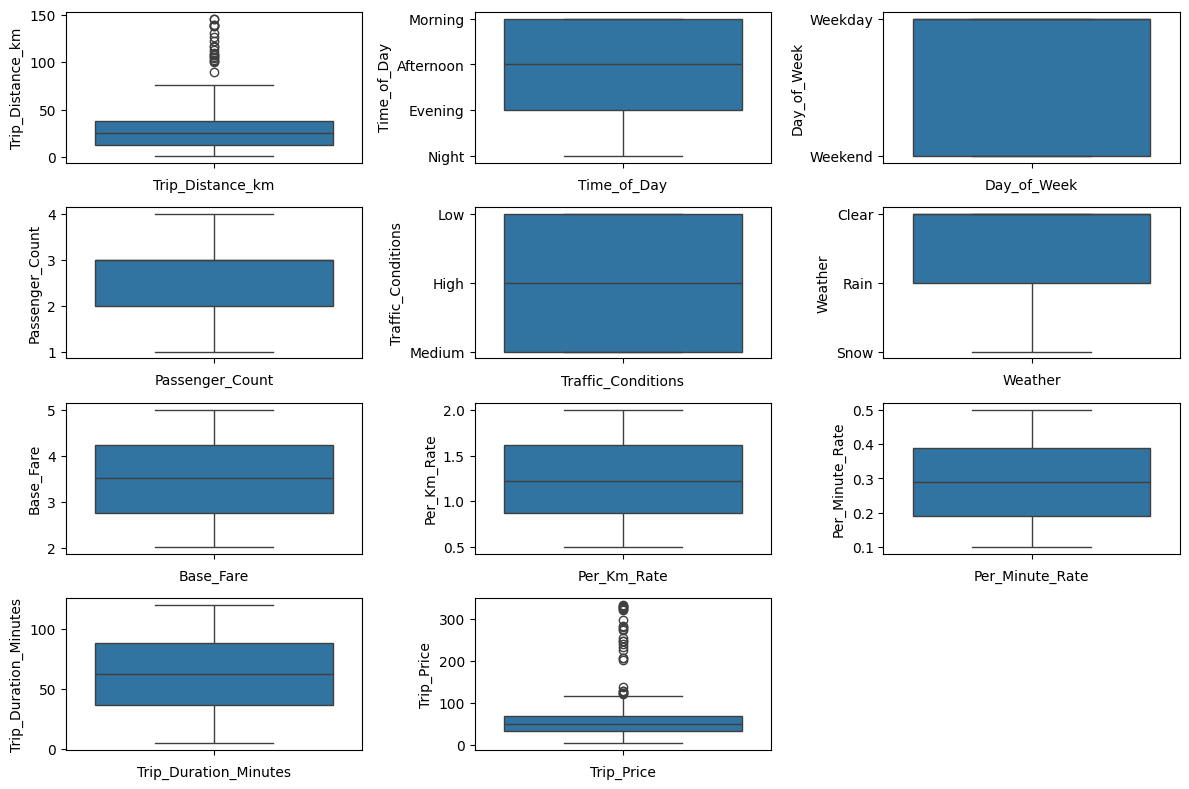

In [ ]:
# Checking For Outliers
plt.figure(figsize=(12,8))
p = 1
for i in data:
  if p <= 11:
    plt.subplot(4,3,p)
    sns.boxplot(data[i])
    plt.xlabel(i)
  p+=1
plt.tight_layout()
plt.show()

In [ ]:
# Filling The Outliers
q1 = np.percentile(data['Trip_Distance_km'], 25)
q3 = np.percentile(data['Trip_Distance_km'], 75)
iqr = q3-q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
data.loc[(data['Trip_Distance_km'] < lower_bound) | (data['Trip_Distance_km'] > upper_bound), 'Trip_Distance_km'] = data['Trip_Distance_km'].median()

In [ ]:
a_q1 = np.percentile(data['Trip_Price'], 25)
a_q3 = np.percentile(data['Trip_Price'], 75)
a_iqr = a_q3-a_q1
a_lower_bound = a_q1-1.5*a_iqr
a_upper_bound = a_q3+1.5*a_iqr
data.loc[(data['Trip_Price'] < a_lower_bound) | (data['Trip_Price'] > a_upper_bound), 'Trip_Price'] = data['Trip_Price'].median()

In [ ]:
# Creating a copy of Dataframe
df = data.copy()

In [ ]:
# Converting The Categorical Data to Numerical Data
df['Time_of_Day'] = df['Time_of_Day'].map({'Morning':0, 'Afternoon':1, 'Evening':2, 'Night':3})

In [ ]:
df['Day_of_Week'] = df['Day_of_Week'].map({'Weekday':0, 'Weekend':1})

In [ ]:
df['Traffic_Conditions'] = df['Traffic_Conditions'].map({'Low':0, 'Medium':1, 'High':2})

In [ ]:
df['Weather'] = df['Weather'].map({'Clear':0, 'Rain':1, 'Snow':2})

In [ ]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350,0,0,3.0,0,0,3.56,0.80,0.320000,53.82,36.2624
1,47.590,1,0,1.0,2,0,3.13,0.62,0.430000,40.57,44.5828
2,36.870,2,1,1.0,2,0,2.70,1.21,0.150000,37.27,52.9032
3,30.330,2,0,4.0,0,0,3.48,0.51,0.150000,116.81,36.4698
4,19.485,2,0,3.0,2,0,2.93,0.63,0.320000,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.490,1,1,4.0,1,0,2.39,0.62,0.490000,58.39,34.4049
996,45.950,3,0,4.0,1,0,3.12,0.61,0.383333,61.96,62.1295
997,7.700,0,0,3.0,0,1,2.08,1.78,0.276667,54.18,33.1236
998,47.560,0,0,1.0,0,0,2.67,0.82,0.170000,114.94,61.2090


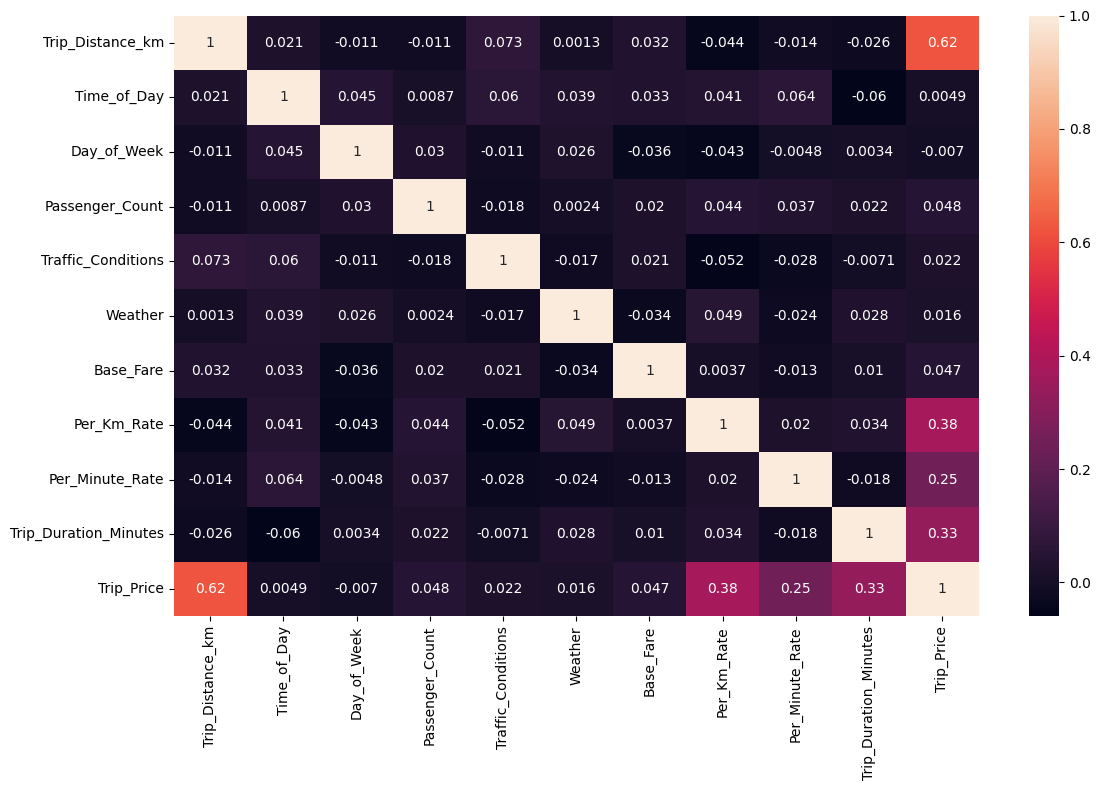

In [ ]:
# Checking The Corelation between features and Target Variabel
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()

In [ ]:
# Defining The Features and Target Variable
x = df.iloc[:, :-1]
y = df['Trip_Price']

In [ ]:
# Splitting The Data to trainning & Testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


In [ ]:
# Scalling The Data Using Standard Scaller
ms = StandardScaler()
x_train_scaled = ms.fit_transform(x_train)
x_test_scaled = ms.transform(x_test)

In [ ]:
# Training The Model with scalled Data
# Default Accuracy Was 62%
model = SVR()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
print(r2_score(y_test, y_pred))

0.6213081548801057


In [ ]:
# Training The Model with Normal Data
# Default Accuracy Was 52%
model1 = SVR(C=5, coef0=0.5, degree=8)
model1.fit(x_train, y_train)
y_predict = model1.predict(x_test)
print(r2_score(y_test, y_predict))

0.5243644542396696


In [ ]:
# Hyperperameter Tunning For SVR
# Accuracy Improved to 82%
# C=10, coef0=0.01
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,5,10],
         'degree' : [3,8],
         'coef0' : [0.01,10,0.5],
         'gamma' : ('auto','scale')}

svr_clf = RandomizedSearchCV(estimator=SVR(), param_distributions=param, verbose=0, n_jobs=-1, cv=3)
clf_svr = svr_clf.fit(x_train_scaled, y_train)
clf_pred = svr_clf.predict(x_test_scaled)
print(clf_svr.best_estimator_)
print(r2_score(y_test, clf_pred))

SVR(C=5, coef0=0.01, degree=8)
0.7912105379341803


In [ ]:
# Model Training With Linear Regression
# Accuracy 71%
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
lr_pred = lr.predict(x_test_scaled)
print(r2_score(y_test, lr_pred))

0.7137087349233022


In [ ]:
# Model Training with Decision Tree
# Accuracy 58%
dt = DecisionTreeRegressor()
dt.fit(x_train_scaled, y_train)
dt_pred = dt.predict(x_test_scaled)
print(r2_score(y_test, dt_pred))

0.5730313636975741


In [ ]:
# Parameter tunning for decision tree
# Accuracy 70%
# criterion='absolute_error', min_samples_leaf=8,min_samples_split=5
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['squared_error', 'absolute_error']
}

clf_dt = RandomizedSearchCV(estimator=DecisionTreeRegressor(), param_distributions=param_grid_dt, verbose=0, n_jobs=-1, cv=3)
clf_dt_model = clf_dt.fit(x_train_scaled, y_train)
clf_dt_pred = clf_dt.predict(x_test_scaled)
print(clf_dt.best_estimator_)
print(r2_score(y_test, clf_dt_pred))

DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=8,
                      min_samples_split=5)
0.709621847806847


In [ ]:
# Random Forest
# Accuracy 78%
rf = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)
rf_pred = rf.predict(x_test_scaled)
print(r2_score(y_test, rf_pred))

0.7816750232611096


In [ ]:
# Parameter tunning for random forest
# Accuracy 76%
# bootstrap=False, max_depth=15, max_features='sqrt',n_estimators=300
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

clf_rf = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_grid_rf, verbose=0, n_jobs=-1, cv=3)
clf_rf_model = clf_rf.fit(x_train_scaled, y_train)
clf_rf_pred = clf_rf.predict(x_test_scaled)
print(r2_score(y_test, clf_rf_pred))


0.7565059969110008


In [ ]:
# XBG
# Accuracy 79%
xgb = XGBRegressor()
xgb.fit(x_train_scaled, y_train)
xgb_pred = xgb.predict(x_test_scaled)
print(r2_score(y_test, xgb_pred))


0.7978911743306826


In [ ]:
# Parameter tunning for XGB
# Accuracy 79%
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

clf_xgb = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=param_grid_xgb, verbose=0, n_jobs=-1, cv=3)
clf_xgb_model = clf_xgb.fit(x_train_scaled, y_train)
clf_xgb_pred = clf_xgb.predict(x_test_scaled)
print(r2_score(y_test, clf_xgb_pred))

0.7950504533979573


SVR Is The Best Predicting Model Among All Models Accuracy Is 82%